In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the notebook wider
plt.style.use('default')

/tmp/ipykernel_2412669/3400341519.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:
# data=np.loadtxt('/work/users/k/b/kbhimani/siggen_ccd_data/fields/ev_fin_ICPC_grid=0.0200_sc=0.0000.dat')
data=np.loadtxt('/work/users/k/b/kbhimani/siggen_ccd_data/fields/ev_fin_UNC_scanner_grid=0.0200_sc=0.0000.dat')

In [14]:
print(data)

[[ 0.000e+00  0.000e+00  0.000e+00  7.555e+02  0.000e+00 -7.555e+02]
 [ 0.000e+00  2.000e-02  1.500e+00  7.566e+02  0.000e+00 -7.566e+02]
 [ 0.000e+00  4.000e-02  3.000e+00  7.591e+02  0.000e+00 -7.591e+02]
 ...
 [ 3.896e+01  8.036e+01  3.500e+03  0.000e+00  0.000e+00  0.000e+00]
 [ 3.896e+01  8.038e+01  3.500e+03  0.000e+00  0.000e+00  0.000e+00]
 [ 3.896e+01  8.040e+01  3.500e+03  0.000e+00  0.000e+00  0.000e+00]]


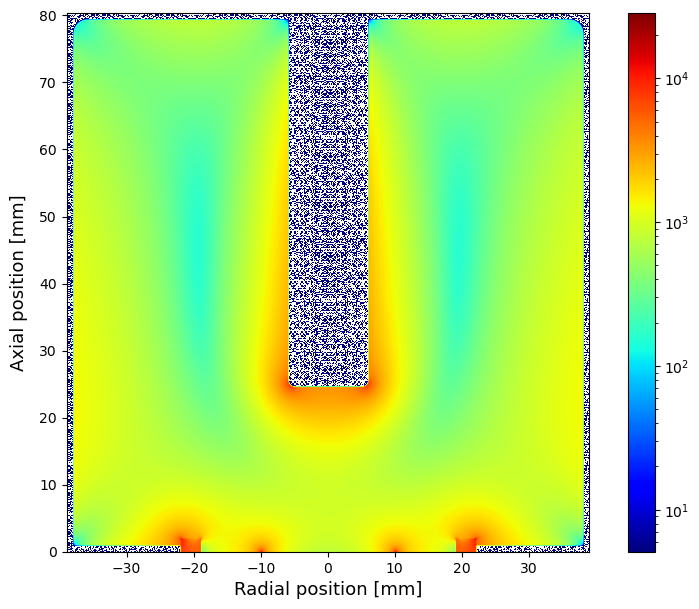

In [15]:
import matplotlib.colors as colors

#data = np.loadtxt("fields/ev_c50372.dat")
# figure out the size of grid the X-Y points
x = set(data[:,0])  # sets only have one copy of anything, so if there are repeats, they are removed
y = set(data[:,1])
z = data[:,3]       # column 3 = field, 2 = potential
# reshape the zvals array into the appropriate shape, and find the boundaries
zvals = z.reshape(len(x), len(y))
zvals[zvals<0] = 0
# imshow plots columns and rows opposite to how you'd expect; so transpose them
zvals = zvals.T
# stack so we can plot the data from one half of the detector (positive r-values only)
zvals_neg = np.fliplr(zvals)
zvals_full = np.hstack((zvals_neg,zvals))
bounds = (-1*max(x), max(x), min(y), max(y))

fig = plt.figure(figsize=(10,7))
ip = plt.imshow(zvals_full, norm=colors.LogNorm(),
                extent=bounds,   # set the boundaries of the edges of the 'image' data
                origin="lower",  # tell matplotlib where [0,0] is in the bottom
                cmap='jet')      # use the 'jet color map scheme
plt.xlabel("Radial position [mm]", size=13)
plt.ylabel("Axial position [mm]", labelpad=8,  size=13)
plt.colorbar()
plt.show()

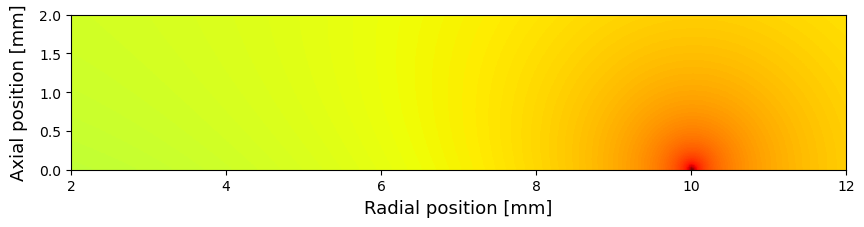

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

n_mm = 10  # Define the number of millimeters from the bottom

# Convert y to a sorted list or numpy array
y_array = np.array(sorted(y))

# Assuming y_array is sorted and evenly spaced
y_spacing = np.abs(y_array[1] - y_array[0])  # Calculate the spacing between y values
num_rows = int(n_mm / y_spacing)  # Calculate the number of rows corresponding to n mm

# Select the appropriate rows from zvals_full
zvals_bottom_n_mm = zvals_full[:num_rows, :]

# Adjust the bounds for the new y-range
new_y_min = min(y_array)  # or 0, if y starts from 0
new_y_max = new_y_min + n_mm
new_bounds = (-1*max(x), max(x), new_y_min, new_y_max)

# Plotting
fig = plt.figure(figsize=(10,7))
ip = plt.imshow(zvals_bottom_n_mm, norm=colors.LogNorm(),
                extent=new_bounds,
                origin="lower",
                cmap='jet')
plt.xlabel("Radial position [mm]", size=13)
plt.ylabel("Axial position [mm]", labelpad=8, size=13)
plt.xlim(2,12)
plt.ylim(0,2)

# plt.colorbar()
plt.show()


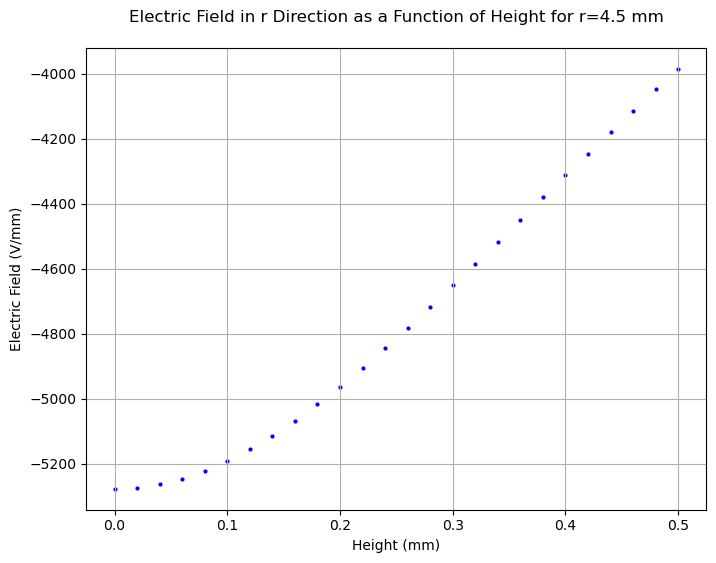

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your NumPy array
# Adjust these values as needed
r_target = 4.5#6.76
z_min = 0.0
z_max = 0.5
tolerance = 0.001  # Example tolerance, adjust based on your data resolution

# Filter data for the specific radial position and height range
filtered_data = data[(np.abs(data[:,0] - r_target) < tolerance) & (data[:,1] >= z_min) & (data[:,1] <= z_max)]
# Sort the filtered data by height (z-axis) to ensure a proper line plot
sorted_data = filtered_data[np.argsort(filtered_data[:,1])]
# Extract height (z-values) and electric field in r direction
height = sorted_data[:,1]  # y column represents height here
field = sorted_data[:,3]  # Assuming column index 4 is the electric field in r direction
field_r = sorted_data[:,4]  # Assuming column index 4 is the electric field in r direction
field_z = sorted_data[:,5]  # Assuming column index 4 is the electric field in r direction

# Plot the electric field in r direction as a function of height for r=6.75 mm within z=0 to z=1 mm
plt.figure(figsize=(8, 6))
plt.scatter(height, field_r, marker='o',s=4, color='blue')
plt.xlabel('Height (mm)')
plt.ylabel('Electric Field (V/mm)')
plt.title(f'Electric Field in r Direction as a Function of Height for r={r_target} mm\n')
plt.grid(True)
plt.show()


In [9]:
print('mean and standard deviation of field are:', np.mean(field), np.std(field))

NameError: name 'field' is not defined

In [ ]:
cut = (z_vals<5) & (r_vals>-7.5)&(r_vals<7.5)

num_skip=10
plt.scatter(r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=field[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Electric field for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

In [8]:
cut = (field>0)
num_skip=1
plt.scatter(r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=potential[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals[cut][0::num_skip], z_vals[cut][0::num_skip], c=potential[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Electric potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

In [138]:
data_wp=pd.read_csv('/Users/kevinhbhimani/Desktop/siggen_sims/GPU_work/siggen_ccd/fields/wp_p1.dat', comment='#', header=None, delim_whitespace=True)
data_wp_np=data_wp.to_numpy()
r_vals_wp = data_wp_np[:,0]
z_vals_wp = data_wp_np[:,1]
wp_vals = data_wp_np[:,2]


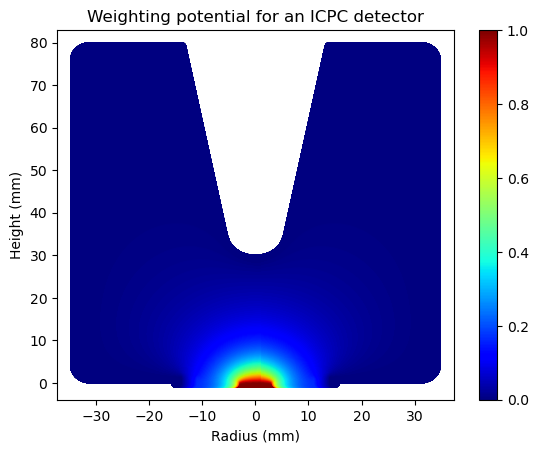

In [200]:
cut=(wp_vals>0)
num_skip=1
plt.scatter(r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Weighting potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

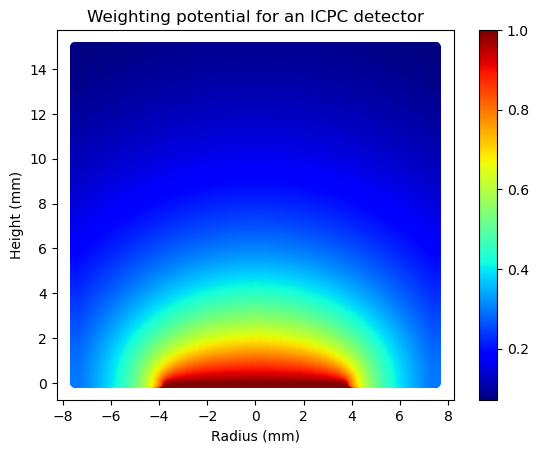

In [199]:
cut = (wp_vals>0) & (wp_vals<3000) & (z_vals<15) & (r_vals>-7.5)&(r_vals<7.5)
num_skip=1
plt.scatter(r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.scatter(-r_vals_wp[cut][0::num_skip], z_vals_wp[cut][0::num_skip], c=wp_vals[cut][0::num_skip], cmap='jet')
plt.colorbar()
plt.xlabel('Radius (mm)')
plt.ylabel('Height (mm)')
# plt.legend(['SOR on CPU','Red-Black SOR on GPU'])
plt.title('Weighting potential for an ICPC detector')
#plt.savefig('/Users/kevinhbhimani/Desktop/Thesis_proposal_figs/RB-SOR_run_time.png')
plt.show()

In [2]:
import os
import h5py
import pandas as pd
from tqdm import tqdm

# Directory containing the waveform files
directory = '/global/u1/k/kbhimani/siggen_ccd/waveforms/ICPC_test/'

# Initialize an empty list to store data
waveforms_data = []

# Iterate over files in the directory
for filename in tqdm(os.listdir(directory)):
    if filename.endswith('.h5') or filename.endswith('.hdf5'):
        with h5py.File(os.path.join(directory, filename), 'r') as file:
            # Check for 'event_data' dataset and 'waveforms' dataset in the file
            event_data = file['event_data']
            waveforms = event_data['waveform']
            # Extract file-level attributes
            grid = file.attrs['grid']
            passivated_thickness = file.attrs['passivated_thickness']
            self_repulsion = file.attrs['self_repulsion']
            detector_name_bytes = file.attrs['detector_name'][:]
            detector_name = detector_name_bytes.tobytes().decode('utf-8')

            # Iterate through each event in the file
            for i in range(event_data.shape[0]):
                # Extract parameters for each event
                eng, r, z, surface_charge = event_data[i]['energy'], event_data[i]['radius'], event_data[i]['height'], event_data[i]['surface_charge']

                # Extract waveform for each event
                waveform = waveforms[i]

                # Append to the list as a dictionary
                waveforms_data.append({
                    'r': r, 
                    'z': z, 
                    'eng': eng, 
                    'sc': surface_charge, 
                    'grid': grid, 
                    'pass_thickness': passivated_thickness, 
                    'self_repulsion': self_repulsion, 
                    'det': detector_name, 
                    'wf': waveform
                })
                
# Convert the list of dictionaries to a DataFrame
waveforms_df = pd.DataFrame(waveforms_data)
# Remove null character from 'det' column
waveforms_df['det'] = waveforms_df['det'].apply(lambda x: x.strip('\x00'))
waveforms_df.head()

100%|██████████| 1/1 [00:00<00:00, 45.75it/s]


,r,z,eng,sc,grid,pass_thickness,self_repulsion,det,wf
0,5.0,0.02,5000.0,0.0,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.0005731115937232972, 0.0015669628..."
1,10.0,0.02,5000.0,0.0,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.00011379479616880417, 0.000433227..."
2,10.0,0.02,5000.0,-0.5,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Text(0, 0.5, 'Normalized Signal')

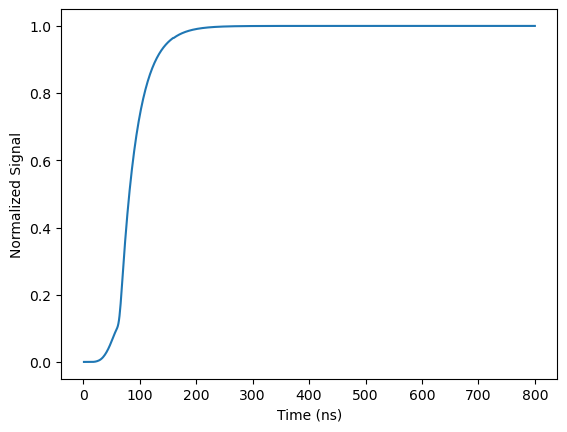

In [3]:
# Example: Query for a specific waveform
r_exp= 10.00
z_exp=0.02
sc_exp=-0.50
eng_exp= 5000
det_exp = 'ICPC_test'
grid_exp = 0.02

query = f"r == {r_exp} and z == {z_exp} and sc == {sc_exp} and eng == {eng_exp} and det == '{det_exp}'  and grid == {grid_exp}"
specific_waveform_row = waveforms_df.query(query).iloc[0]['wf']

sim_time=800
step_time_out = 1
time = np.linspace(start=step_time_out, stop= sim_time, num= (int) (sim_time/step_time_out))

plt.plot(time, specific_waveform_row)
plt.xlabel('Time (ns)')
plt.ylabel('Normalized Signal')

In [4]:
import numpy as np
from tqdm import tqdm
from dspeed.processors.trap_filters import trap_norm
def apply_trap_filter(waveform, rise, flat, pickoff):
    """
    Apply trapezoidal filter to a waveform and return the energy estimate.

    Parameters:
    - waveform: The input waveform data
    - rise: Rise time of the trapezoidal filter
    - flat: Flat top duration of the trapezoidal filter
    - pickoff: The sample point to pick off the filtered signal

    Returns:
    - Energy estimate from the trapezoidal filter
    """
    trap_out = np.zeros_like(waveform)
    trap_norm(waveform, rise, flat, trap_out)
    return trap_out[pickoff]

# Parameters for the trapezoidal filter
rise = 100
flat = 200
pickoff = 300

# Initialize lists for storing results
energy_estimate = []

# Loop through each waveform in the DataFrame
for index, row in tqdm(waveforms_df.iterrows(), total=waveforms_df.shape[0]):
    # Apply the trapezoidal filter
    estimated_energy = apply_trap_filter(row['wf'], rise, flat, pickoff)
    energy_estimate.append(estimated_energy)

# Add the energy estimates to the DataFrame
waveforms_df['energy_estimate'] = energy_estimate


100%|██████████| 3/3 [00:00<00:00, 4714.47it/s]


In [5]:
waveforms_df

,r,z,eng,sc,grid,pass_thickness,self_repulsion,det,wf,energy_estimate
0,5.0,0.02,5000.0,0.0,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.0005731115937232972, 0.0015669628...",0.982883
1,10.0,0.02,5000.0,0.0,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.00011379479616880417, 0.000433227...",0.994372
2,10.0,0.02,5000.0,-0.5,0.02,0.002,1,ICPC_test,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.997494
